## Day 28 Lecture 1 Assignment

In this assignment, we will learn about making predictions with linear models. We will use the king county housing dataset loaded below and analyze the regression from this dataset.

In [0]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [0]:
king_county = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/kc_house_data.csv')

In [85]:
king_county.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [86]:
king_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


We'll start by adding a column of the log of total sqare feet. This transformation will help us with model assumptions.

In [87]:
# answer below:
king_county['tot_sqft'] =  king_county['sqft_living'] + king_county['sqft_lot'] + king_county['sqft_above'] + king_county['sqft_basement'] + king_county['sqft_living15'] + king_county['sqft_lot15']
king_county['log_tot_sqft'] = np.log(king_county['tot_sqft'])
king_county.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,tot_sqft,log_tot_sqft
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,15000,9.615805
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,21711,9.985574
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,22322,10.013328
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,15280,9.634300
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,20743,9.939964


Filter out columns and keeping only: price, bedrooms, bathrooms, sqft_living, floors, waterfront

In [88]:
king_county_f = king_county.drop(['id','date','view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'sqft_lot', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'tot_sqft',
       'log_tot_sqft'], axis = 1)
king_county_f.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront
0,221900.0,3,1.00,1180,1.0,0
1,538000.0,3,2.25,2570,2.0,0
2,180000.0,2,1.00,770,1.0,0
3,604000.0,4,3.00,1960,1.0,0
4,510000.0,3,2.00,1680,1.0,0


Next, we'll check for missing values and remove rows containing missing values. We will also make sure that all our data is numeric and convert the columns that are of object type to numeric. Make sure to remove any rows with missing data resulting from the conversion to numeric.

In [89]:
# answer below:
king_county_f.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
floors         0
waterfront     0
dtype: int64

In [90]:
king_county_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
price          21613 non-null float64
bedrooms       21613 non-null int64
bathrooms      21613 non-null float64
sqft_living    21613 non-null int64
floors         21613 non-null float64
waterfront     21613 non-null int64
dtypes: float64(3), int64(3)
memory usage: 1013.2 KB


In [91]:
king_county_f.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront'],
      dtype='object')

Split the data into test and train subsets. Use 20% of the data for the test subset. Use price as the dependent variable.

In [0]:
# answer below:
from sklearn.model_selection import train_test_split

X = king_county[['bedrooms', 'bathrooms', 'sqft_living', 'floors','waterfront']]
y = king_county['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=25)


In [93]:
# answer below
# run OLS from stats
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(y, X).fit()

results.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     5101.
Date:                Wed, 06 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:32:23   Log-Likelihood:            -2.9918e+05
No. Observations:               21613   AIC:                         5.984e+05
Df Residuals:                   21607   BIC:                         5.984e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         6.63e+04   7408.987      8.948      0.000    5.18e+04    8.08e+04
bedrooms    -5.049e+04   2271.210    -22.231      0.000   -5.49e+04    -4.6e+04
bathrooms    8418.5195   3678.627      2.288      0.022    1208.140    1.56e+04
sqft_living   296.5295      2.994     99.035      0.000     290.661     302.398
floors       2300.4388   3641.632      0.632      0.528   -4837.428    9438.306
waterfront   7.948e+05   1.97e+04     40.295      0.000    7.56e+05    8.33e+05
==============================================================================
Omnibus:                    13151.890   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           409366.007
Skew:                           2.408   Prob(JB):                         0.00
Kurtosis:                      23.770   Cond. No.                     2.65e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Check the model assumptions: homoscedacity, normal errors, and multicollinearity

In [94]:
# normal errors
import statsmodels.api as sm
predictions = results.predict(X)
errors = y - predictions

print("Mean of the errors in the king county model is: {}".format(np.mean(errors)))

Mean of the errors in the king county model is: 1.7255505277437268e-08


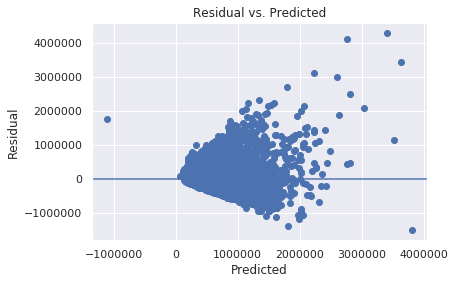

Bartlett test statistic value is 148.551 and p value is 3.59e-34
Levene test statistic value is 189.874 and p value is 4.18e-43


In [95]:
#answer below:
#homoscedacity
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))


In [96]:
# multicollinearity: variance inflation factor (above 5 is suspicious and above 10 is collinear)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(X)
pd.Series([variance_inflation_factor(X.values, i)
    for i in range (X.shape[1])],
    index= X.columns)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const          19.188839
bedrooms        1.559729
bathrooms       2.805743
sqft_living     2.643469
floors          1.351676
waterfront      1.018017
dtype: float64

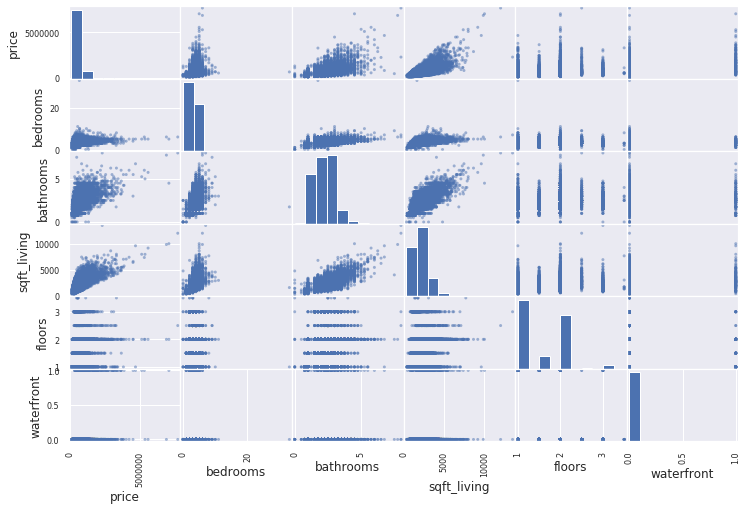

In [104]:
#try pd scatter matrix plot (linearity of coefficients)
pd.plotting.scatter_matrix(king_county_f, figsize=(12,8));

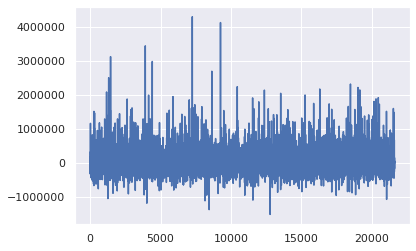

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


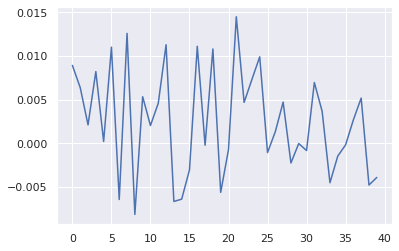

In [97]:
#autocorrelation function
plt.plot(errors)
plt.show()

from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

There are two model assumptions that fail. One way to fix them is to apply a log transformation to price. Create a new train test split where y is the natural log of price and retest the model assumptions.

In [0]:
# answer below
y1 = np.log(king_county['price'])
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.20, random_state=25)

Create a linear model and produce a model summary

In [106]:
# answer below
# run OLS from stats
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(y1, X).fit()

results.summary()


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     4379.
Date:                Wed, 06 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:40:23   Log-Likelihood:                -9247.1
No. Observations:               21613   AIC:                         1.851e+04
Df Residuals:                   21607   BIC:                         1.855e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2353      0.011   1106.143      0.000      12.214      12.257
bedrooms       -0.0448      0.003    -13.207      0.000      -0.051      -0.038
bathrooms       0.0315      0.005      5.731      0.000       0.021       0.042
sqft_living     0.0004   4.47e-06     86.532      0.000       0.000       0.000
floors          0.0588      0.005     10.814      0.000       0.048       0.069
waterfront      0.6068      0.029     20.605      0.000       0.549       0.665
==============================================================================
Omnibus:                        2.187   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.335   Jarque-Bera (JB):                2.177
Skew:                           0.024   Prob(JB):                        0.337
Kurtosis:                       3.006   Cond. No.                     2.65e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Predict the y values for the test sample using our model above.

Plot the true vs. predicted values and compute the MAE, MSE, RMSE and MAPE

In [107]:
# normal errors
import statsmodels.api as sm
predictions = results.predict(X)
errors = y1 - predictions

print("Mean of the errors in the king county model is: {}".format(np.mean(errors)))

Mean of the errors in the king county model is: -3.562033942789211e-14


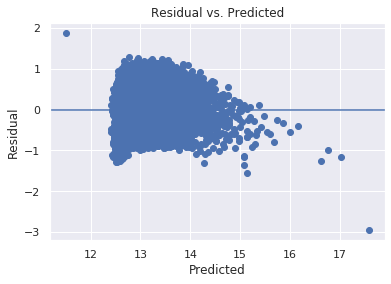

Bartlett test statistic value is 0.958334 and p value is 0.328
Levene test statistic value is 131.858 and p value is 1.78e-30


In [108]:
#homoscedacity
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

In [109]:
# multicollinearity: variance inflation factor (above 5 is suspicious and above 10 is collinear)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(X)
pd.Series([variance_inflation_factor(X.values, i)
    for i in range (X.shape[1])],
    index= X.columns)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const          19.188839
bedrooms        1.559729
bathrooms       2.805743
sqft_living     2.643469
floors          1.351676
waterfront      1.018017
dtype: float64

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


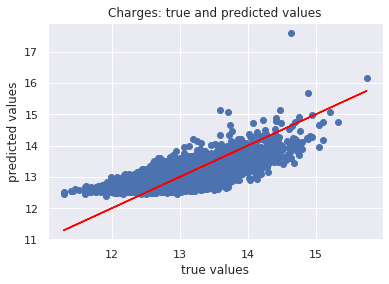

Mean absolute error of the prediction is: 0.3015112718625918
Mean squared error of the prediction is: 0.14001536252886665
Root mean squared error of the prediction is: 0.3741862671569691
Mean absolute percentage error of the prediction is: 2.312983431603657


In [115]:
# answer below:
# We add constant to the model as it's a best practice
# to do so every time!
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
X_test = sm.add_constant(X_test)

# We are making predictions here
y1_preds = results.predict(X_test)


plt.scatter(y1_test, y1_preds)
plt.plot(y1_test, y1_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y1_test, y1_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y1_test, y1_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y1_test, y1_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y1_preds) / y_test)) * 100))